In [64]:
from IPython.display import Image
import dis


# Chater4. 사전과 셋

배울 내용

* 사전과 셋의 용도
* 사전과 셋의 유사점
* 사전의 오버페드
* 사전의 성능을 최적화 하는 방법
* 파이썬에서 사전을 사용해서 네임스페이스를 유지하는 방법

hashable 하다 

사전과 셋은 정렬되지 않음.  
고유하게 참조할 수 있는 별도 객체가 있는 상황에서 사용  

참조하는 객체는 일반적으로는 문자열이고 hashable하다면 어떤 타입도 상관없음.  

참조객체 : key
데이터 : value  

사전과 셋은 유사하나 셋에는 value가 없다.  
셋은 유일한 키를 저장하는 자료구조이다.  

### Hash Function : 임의의 길이를 갖는 임의의 데이터를 고정된 길이의 데이터로 매핑하는 함수.  아무리 큰 숫자를 넣더라도 정해진 크기의 숫자가 나오는 함수   

ex) 수를 나누었을 때 나머지를 구하는 함수 

### Hash Value, Hash Code, Hash Sum, Check Sum : 이러한 hash function을 적용해서 나온 고정된 길이의 값 

hash(object): object의 저장된 내용을 기준으로 한 개의 정수를 생성하여 반환하는 함수

- 이 함수는 hasher라고도 부른다. hash 함수안에 인자로 들어가는 object은 하나의 값일 수도 있고, 여러 개의 값을 갖고 있는 컨테이너 일 수도 있다. 즉, 내용이 뭐든지간에(사실, 조건이 없진 않다..), 이에 해당하는 숫자 하나를 무조건 생성한다고 생각하면 된다.  아래의 예시처럼, string이 무엇이든 간에 hash function을 통과하고나면 무조건 하나의 숫자로 반환되는 함수를 의미한다. 이는 튜플일 수도 있는데 (1, 2, 3) 을 hash function에 넣어, 2366528764324이 나왔다고 하면, 이 튜플은 hashable object 라고 부른다.


### hashable은 왜 필요할까?

비교를 위해 사용된다. 즉, hash을 하고나면, 각 객체가 숫자로 나오기 때문에, 같은 객체인지 다른객체인지 비교가 가능하다. 같은 숫자면 같은 객체로 인식한다. 또한, 컨테이너인 객체들도, hash을 이용하면 한번에 비교가 가능하다. 가령 (a, b, c)인 객체와 (d, b, c)인 객체를 비교할 대도, 각각의 원소들이 같은지 여러번 비교를 하는 것이 아니라, hash 값만 있으면 비교가 가능하므로, 한 번의 비교 연산만이 필요하다. 즉, 1) Computationally robust함을 유지하기 하기위해 사용된다 (쉽게 말하면, 다른 객체는 다른 해시함수를 갖어야한다). 다른 객체들이 같은 해시를 가지면 충돌이 일어날 수 있다. 2) 같은 오브젝트가 일관성 있게, 같은 값을 가질 수 있도록 표식한다. 


### [ HashTable(해시테이블)이란? ]
해시 테이블은 (Key, Value)로 데이터를 저장하는 자료구조 중 하나로 빠르게 데이터를 검색할 수 있는 자료구조이다. 해시 테이블이 빠른 검색속도를 제공하는 이유는 내부적으로 배열(버킷)을 사용하여 데이터를 저장하기 때문이다. 해시 테이블은 각각의 Key값에 해시함수를 적용해 배열의 고유한 index를 생성하고, 이 index를 활용해 값을 저장하거나 검색하게 된다. 여기서 실제 값이 저장되는 장소를 버킷 또는 슬롯이라고 한다.

 


예를 들어 우리가 (Key, Value)가 ("John Smith", "521-1234")인 데이터를 크기가 16인 해시 테이블에 저장한다고 하자. 그러면 먼저 index = hash_function("John Smith") % 16 연산을 통해 index 값을 계산한다. 그리고 array[index] = "521-1234" 로 전화번호를 저장하게 된다.

어라훈 구조로 데이터를 저장하면 Key값으로 데이터를 찾을 때 해시 함수를 1번만 수행하면 되므로 매우 빠르게 데이터를 저장/삭제/조회할 수 있다. 해시테이블의 평균 시간복잡도는 O(1)이다.

 



hash가 가능한 타입 :  __hash__ magic function, __eq__ 혹은 __cmp__ magic function을 구현한 타입 --> 추가
### 파이썬 내장 타입은 이를 모두 구현한다 ???

In [23]:
hash((1, 2, 3))

529344067295497451

In [24]:
hash([1, 2, 3])

TypeError: unhashable type: 'list'

In [25]:
hash({1:2, 3:4})

TypeError: unhashable type: 'dict'

In [27]:
hash(set([1, 2, 3]))

TypeError: unhashable type: 'set'

사전과 셋은 주어진 색인을 O(1) 시간 복잡도 안에 찾아준다.   
삽입 연산의 시간복잡도는 리스트/튜플과 같은 O(1) 이다.  

또한  이 시간복잡도는 개방 주소 open address 해시 테이블을 사용했을 경우이다.  --> 추가

단점 :  
* 사전과 셋은 메모리를 많이 사용한다.  
* 사용하는 해시 함수에 속도를 전적으로 의존한다 .  --> 추가
* 해시 함수가 느리다면 사전과 셋의 연산도 느려진다.  

In [2]:
# 예제 4-1 리스트를 이용한 전화번호 검색

def find_phonenumber(phonebook, name):
    for n, p in phonebook:
        if n == name:
            return p

    return None

phonebook  = [
    ("John Doe", "555-5555-5555"),
    ("Albert Einstein", "212-555-5555")
]

print(f"John Doe's phone number is {find_phonenumber(phonebook, 'John Doe')}")

John Doe's phone number is 555-5555-5555


### 만약 이 리스트를 정렬한 다음에 bisect 모듈을 이용하면 O(log n)의 시간복잡도로 검색할 수 있다. 

In [7]:
# 예제 4-2 사전을 이용한 전화번호 검색

phonebook = {
    "John Doe": "555-5555-5555",
    "Albert Einstein" : "212-555-5555"
}
print(f"John Doe's phone number is {phonebook['John Doe']}")

John Doe's phone number is 555-5555-5555


색인으로 이름을 찾으면 이렇게 전화번호를 받을 수 있다.  
전체 데이터를 살펴보는 대신 직접 참조를 통해 필요한 값을 가져올 수 있다. 

In [14]:
# 예제 4-3 리스트와 셋에서 유일한 이름 찾기 

def list_unique_names(phonebook):
    unique_names = []
    for name, phonenumber in phonebook:
        first_name, last_name = name.split(" ", 1)
        for unique in unique_names:
            if unique == first_name:
                break  
        else:
            unique_names.append(first_name)
    return len(unique_names)


def set_unique_names(phonebook):
    unique_names = set()
    for name, phonenumber in phonebook:
        first_name, last_name = name.split(" ", 1)
        unique_names.add(first_name)
    return len(unique_names)

In [15]:
phonebook = [
    ("John Doe", "555-555-5555"),
    ("Albert Einstein", "202-555-5555"),
    ("John Murphey", "212-555-5555"),
    ("Albert Rutherford", "647-555-5555"),
    ("Guido van Rossum", "301-555-5555")
]

print("Number of unique names from set method", set_unique_names(phonebook))
print("Number of unique names from list method", list_unique_names(phonebook))

Number of unique names from set method 3
Number of unique names from list method 3


### 리스트를 이용한 알고리즘의 시간복잡도는 O(n^2) 이다.  

중복되는 이름이 없는 최악의 상황에는 크기가 phonebook만큼 커진다.   
이는 계속 커지는 리스트에서 전화번호부의 각 이름을 선형 탄색하는 작업이다.  

### 셋을 이용한 최종 알고리즘의 시간 복잡도는 O(n)이다.  

set.add 연산은 전화번호부의 크기에 상관없이 O(1) 시간복잡도로 수행된다.  
상수 시간에 수행되지 않는 연산은 전화번호부를 순회하는 루프뿐이다.  

In [17]:
%timeit list_unique_names(phonebook)

1.61 µs ± 8.62 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [18]:
%timeit set_unique_names(phonebook)

1.49 µs ± 19.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## 4.1 사전과 셋의 동작 원리  


사전과 셋은 모두 해시 테이블을 사용해서 시간복잡도가 O(1) 이다  --> 추가
임의의 키를 리스트의 색인으로 변화하는 해시함수 사용  

### 4.1.1 삽입과 검색  

해시 테이블을 처음 생성하면 배열을 사용할 때 처럼 메모리부터 할당한다.  
배열에서의 데이터 추가 : 사용하지 않은 메모리 블록을 찾아서 데이터를 추가하고 필요할 때 크기를 조정  
해시 테이블 에서의 데이터 추가 : 이 연속적인 메모리에 데이터를 나열할 방법을 생각해 봐야함  --> 추가

새로운 데이터의 위치는 키의 해시값, 데이터의 값을 다른 객체와 비교하는 방법으로 결정된다.  

### Data -> Hash Function -> Hash Value -> Masking -> Index ??

### 파이썬은 키/값 데이터를 표준배열(?) 에 덧붙이고 오직 이 배열의 색인만 해시 테이블에 저장한다.  
### 이 덕분에 메모리 사용량이 30 ~ 95% 줄어든다.  

새로운 색인은 단순한 선형 함수를 이용해서 계산하는데 이를 Probing이라고 한다.  
파이썬의 Probing 메커니즘은 원래 해시값에서 더 상위 Bit를 활용한다.  ---> 추가

In [29]:
# 예제 4-4 사전 탐색 과정

def index_sequence(key, mask=0b111, PERTURB_SHIFT = 5):
    perturb = hash(key)
    i = perturb & mask
    yield i
    while True:
        perturb >>= PERTURB_SHIFT
        i = (i * 5 + perturb + 1) & mask
        yield i

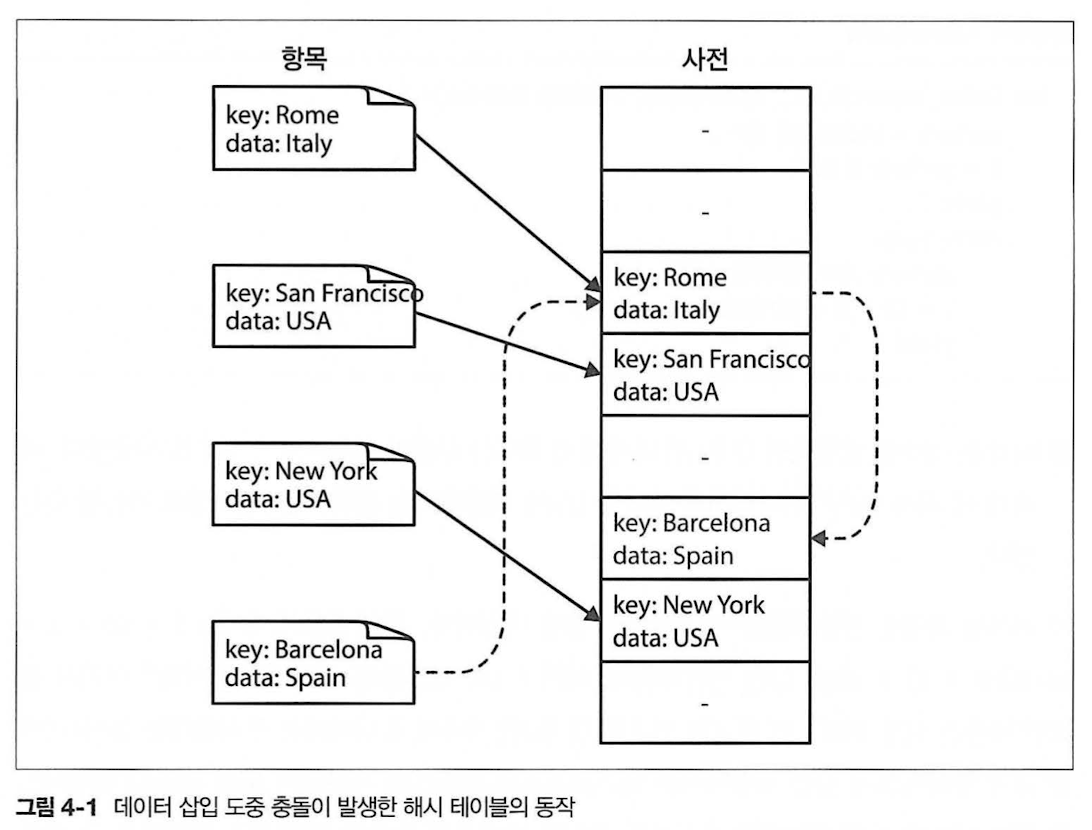

In [30]:
Image("./img/4-1.png")

In [31]:
def City(str):
    def __hash__(self):
        return ord(self[0])

# 임의 값의 도시 이름으로 사전 생성

data = {
    City("Rome") : "Italy",
    City("San Francisco") : "USA",
    City("New York") : "USA",
    City("Barcelona") : "Spain"
}

In [37]:
a = City("Barcelona")

In [40]:
b = City("Rome")

In [41]:
a.__hash__ == b.__hash__

True

### 4.1.2 삭제

해시 테이블에서 값을 삭제할 때 단순히 해당 메모리 블록을 NULL 로 만드는 방법은 사용할 수 없다.  
NULL 을 Probing 시 해시 충돌을 위한 감싯값 Sentinel Value로 사용하기 때문이다.  -->  추가
따라서 해당 블록이 비었음을 나타내는 특수한 값을 기록해두고 나중에 해시 충돌을 해결하는 과정에서 이 값을 활용해야 한다.  
예를 들어 Rome이 삭제된 다음에 Barcelona를 검색하면 처음에는 Rome이 들어있던 블록이 비었음을 나태는 값이 있는 배열 항목을 먼저 만난다.  
값을 찾지 못했다고 멈추는 대신, index_sequence 함수가 반환하는 다음 색인을 검색해야 한다.  
해시 테이블의 빈 슬롯은 새로운 값이 쓰이거나 해시 테이블의 크기가 변경될 때 삭제된다.  

### 4.1.3 크기 변경  

해시 테이블의 2/3 이하만 채워진다면 충돌 횟수와 공간 활용이 적절함.  

크기를 변경할 때는 충분히 큰 해시 테이블을 할당하고 (더 많은 메모리를 할당하고 ) 그 크기에 맞게 마스크값을 조정한다.  
-> 이후 모든 항목을 새로운 해시 테이블로 옮기는데  
이 과정에서 바뀐 마스크값 때문에 색인을 새로 계산해야 하기 때문에 해시 테이블 크기 변경은 비싼 작업이다.  

그러나 크기 변경은 여유공간이 아주 적을 때만 수행되기 때문에 보통 개별항목 추가는 시간복잡도가 O(1) 이다.   


기본적으로 dicttionay 나 set의 최소 크기는 8이다.  그리고 사전이 2/3만큼 찰 때마다 크기를 3배 늘린다.  

8, 18, 39, 81, 165, 333, 669.....

### 4.1.4 해시 함수와 엔트로피 

파이썬 객체는 __hash__와 __cmp__ 함수를 구현하므로 해시가 가능.  
튜플, 문자열, int, float 


In [42]:
hash("str")

-8933113757513874176

In [43]:
hash(5)

5

In [44]:
hash(5.0)

5

In [46]:
int(5).__hash__

<method-wrapper '__hash__' of int object at 0x10919c9e0>

__hash__ 함수는 내장 함수인 id 함수를 이용해서 객체의 메모리 위치를 반환한다.  
__cmp__ 연산자는 객체의 메모리 위치를 산술 비교 

In [51]:
class Point(object):
    def __init__(self, x, y):
        self.x, self.y = x, y

만약 x, y값이 동일한 Point 객체를 여러 개 생성하면  
메모리에서 각 객체는 서로 다른 위치에 있으므로 해시값이 모두 다르다.   
이 객체들을 모두 같은 set에 추가한다면 각각의 항목이 추가된다.  

In [52]:
p1 = Point(1, 1)
p2 = Point(1, 1)
set([p1, p2])

{<__main__.Point at 0x7fc17baf6490>, <__main__.Point at 0x7fc17baf6580>}

In [53]:
Point(1, 1) in set([p1, p2])

False

다 다른 것을 알 수 있음. 

In [54]:
class Point2(object):
    def __init__(self, x, y):
        self.x, self.y = x, y

    def __hash__(self):
        return hash((self.x, self.y))

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

이 해시함수는 같은 내용의 객체에 대해서는 항상 같은 결과를 반환한다.  
인스턴스화한 객체의 메모리 주소가 아니라 Point 객체의 속성으로 dictionary 나 set에 필요한 색인을 만들 수 있다. 


In [55]:
p3 = Point2(1, 1)
p4 = Point2(1, 1)
set([p3, p4])

{<__main__.Point2 at 0x7fc17ba6bdc0>}

In [56]:
Point2(1, 1) in set([p3, p4])

True

### 사용자 정의 해시 함수에서 충돌을 피하려면 해시값이 균일하게 분포되도록 신경 써야 한다.  
### 충돌이 잦으면 해시 테이블의 성능에 악영향을 끼친다.   
### 사전의 모든 키가 충돌하는 "최악의 상황" 에는 사전의 탐색 성능이 리스트와 같은 O(n)이 된다. 

In [58]:
# 예제 4-6 두 소문자를 조합한 최적 해시 함수

def twoletter_hash(key):
    offset = ord('a')
    k1, k2 = key
    return (ord(k2), - offset) + 26 * (ord(k1) - offset)

In [59]:
# 예제 4-7 좋은 해시함수와 나쁜 해시함수의 시간 차이

import string
import timeit

class BadHash(str):
    def __hash__(self):
        return 42


class GoodHash(str):
    def __hash__(self):
        """
        아래는 twoletter hash 함수를 약간 개선한 버전
        """
        return ord(self[1]) + 26 * ord(self[0]) - 2619

In [61]:
baddict = set()
gooddict = set()

for i in string.ascii_lowercase:
    for j in string.ascii_lowercase:
        key = i + j
        baddict.add(BadHash(key))
        gooddict.add(GoodHash(key))

badtime = timeit.repeat(
    "key in baddict",
    setup = "from __main__ import baddict, BadHash; key = BadHash('zz')", 
    repeat = 3,
    number = 1_000_000
)

goodtime = timeit.repeat(
    "key in gooddict",
    setup = "from __main__ import gooddict, GoodHash; key = GoodHash('zz')",
    repeat = 3,
    number = 1_000_000
)

print(f"Min lookup time for baddict: {min(badtime)}")
print(f"Min lookup time for gooddict: {min(goodtime)}")

Min lookup time for baddict: 14.662611195999489
Min lookup time for gooddict: 0.27555154000037874


## 4.2 사전과 네임스페이스 

파이썬에서 객체, 함수 모듈 찾을 때 찾는 순서 :   
### locals() -> globals() -> __builtin__  

locals(), globals() : dictionary  
__builtin__ : 모듈 객체  

__builtin__ 은 모듈 내부에서 locals() dictionary를 탐색하여 특정 속성을 찾는다. 


In [65]:
# 예제 4-8 네임스페이스 탐색  

import math
from math import sin

def test1(x):
    
    res = 1
    for _ in range(1000):
        res += math.sin(x)
    return res


def test2(x):

    res = 1
    for _ in range(1000):
        res += sin(x)
    return res

def test3(x):
    
    res = 1
    for _ in range(1000):
        res += sin(x)
    return res

In [66]:
dis.dis(test1)

  8           0 LOAD_CONST               1 (1)
              2 STORE_FAST               1 (res)

  9           4 LOAD_GLOBAL              0 (range)
              6 LOAD_CONST               2 (1000)
              8 CALL_FUNCTION            1
             10 GET_ITER
        >>   12 FOR_ITER                18 (to 32)
             14 STORE_FAST               2 (_)

 10          16 LOAD_FAST                1 (res)
             18 LOAD_GLOBAL              1 (math)
             20 LOAD_METHOD              2 (sin)
             22 LOAD_FAST                0 (x)
             24 CALL_METHOD              1
             26 INPLACE_ADD
             28 STORE_FAST               1 (res)
             30 JUMP_ABSOLUTE           12

 11     >>   32 LOAD_FAST                1 (res)
             34 RETURN_VALUE
